[# **KLIK DISINI UNTUK MENGISI DATA **](#scrollTo=3Vt6ahZwOneD&line=11&uniqifier=1)

# Crawl Data Twitter > 1500 Tweets
The crawling process was done using Tweet-Harvest. Written by Helmi Satria on October 18th.

In [ ]:
#@title Twitter Auth Token

twitter_auth_token = 'e020'

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [713 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,859 kB]
Get:13 http://archive.ubuntu.com/

In [ ]:
cari_data = 'kectenjo' # Ganti ini saja
filename = f'{cari_data}.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Crawl Data

search_keyword = 'geocode:-6.361889,106.469760,10km until:2023-12-31 since:2018-01-01'
#polygon_coordinates = '-6.561612,106.624152 -6.567240,106.640116 -6.595699,106.643781 -6.596186,106.619464 -6.578068,106.615542' # Koordinat polygon kecmatan lewiliyang
limit = 1500

!npx --yes tweet-harvest@2.2.8 -o "{filename}" -s "{search_keyword}" -l {limit} --token {twitter_auth_token}



ERROR: You must supply a command.

Execute binaries from npm packages.

  npx [options] <command>[@version] [command-arg]...

  npx [options] [-p|--package <package>]... <command> [command-arg]...

  npx [options] -c '<command-string>'

  npx --shell-auto-fallback [shell]


Options:
  --package, -p          Package to be installed.                       [string]
  --cache                Location of the npm cache.                     [string]
  --always-spawn         Always spawn a child process to execute the command.
                                                                       [boolean]
  --no-install           Skip installation if a package is missing.    [boolean]
  --userconfig           Path to user npmrc.                            [string]
  --call, -c             Execute string as if inside `npm run-script`.  [string]
  --shell, -s            Shell to execute the command with, if any.
                                                       [string] [default: false]
  

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk
!pip install pandas
!pip install numpy
!pip install mtranslate
import preprocessor as p
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import mtranslate as mt
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"/content/tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=";")

# Display the DataFrame
display(df)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sat Dec 30 23:55:52 +0000 2023,1741246759345799474,Mahfud membuktikan bahwa pengembangan ekonomi ...,0,0,0,0,in,1691345436920164352,1741246759345799474,annisyawlin,https://twitter.com/annisyawlin/status/1741246...
1,Sat Dec 30 23:54:44 +0000 2023,1741246472937673151,Taken by a shit android phone. and a random bu...,0,0,0,1,en,1365674774794440704,1741246472937673151,XeruzVm,https://twitter.com/XeruzVm/status/17412464729...
2,Sat Dec 30 23:51:33 +0000 2023,1741245669632074214,once bitten and twice shyyyy https://t.co/2Djp...,0,5,0,5,en,1216389468258586626,1741245669632074214,mdfrezaaa,https://twitter.com/mdfrezaaa/status/174124566...
3,Sat Dec 30 23:50:39 +0000 2023,1741245445681332465,@FOODFESS2 Liarrr biasaaa,0,0,0,0,in,1662477514441375747,1738884207114596657,BerkahRust87364,https://twitter.com/BerkahRust87364/status/174...
4,Sat Dec 30 23:49:51 +0000 2023,1741245241834000692,"Melalui langkah-langkah Mahfud, kita dapat yak...",0,0,0,0,in,1691322911339212800,1741245241834000692,MayaTri1iii,https://twitter.com/MayaTri1iii/status/1741245...
5,Sat Dec 30 23:49:30 +0000 2023,1741245155007697231,@faaizugab tas kresek,0,1,0,0,in,298627182,1741197978801709227,anansincand,https://twitter.com/anansincand/status/1741245...
6,Sat Dec 30 23:49:25 +0000 2023,1741245132551393473,"@mytrash06 Jangan sampe sih, siang ini harus t...",0,1,0,0,in,1630590680077856768,1741244427816067520,bumantaranaraya,https://twitter.com/bumantaranaraya/status/174...
7,Sat Dec 30 23:46:37 +0000 2023,1741244427816067520,Siapa yang semalem-subuh demam ampe meriang da...,0,1,0,1,in,1630590680077856768,1741244427816067520,bumantaranaraya,https://twitter.com/bumantaranaraya/status/174...
8,Sat Dec 30 23:45:28 +0000 2023,1741244139386306798,"@whoopziy Jadi paham, kalo di komunitas terten...",0,0,0,0,in,64826515,1740909585115074923,Tojil,https://twitter.com/Tojil/status/1741244139386...
9,Sat Dec 30 23:44:12 +0000 2023,1741243820820623607,Tahap awalnya itu emang denial sih.,3,13,2,97,in,102215394,1741243820820623607,Arie_Kriting,https://twitter.com/Arie_Kriting/status/174124...


In [ ]:
filename= filename               #nama file
foldername="Scrapping"       #nama folder
driveroot = "/content/drive/MyDrive/"
fileinput= driveroot+foldername+"/"+filename  #copy path untuk fileinput

#tambah stopwords secara manual untuk cleaning wordcloud
jangan_Cari = ['menang','dapil','mahfud','pks','banget','gk','you','sih' 'maju',"jum'at",'bgt','amp','gak','gue','projo','kabupaten','dramaga','bogor','kamis','pemangku','kepentingan','kalo','senin','ya','nya','yg','melaksanakan','ganjar','pranowo','ga','aja','hadir','ada','adalah','adanya','adapun','agak','agaknya','agar','akan','akankah','akhir','akhiri','akhirnya','aku','akulah','amat','amatlah','anda','andalah','antar','antara','antaranya','apa','apaan','apabila','apakah','apalagi','apatah','artinya','asal','asalkan','atas','atau','ataukah','ataupun','awal','awalnya','bagai','bagaikan','bagaimana','bagaimanakah','bagaimanapun','bagi','bagian','bahkan','bahwa','bahwasanya','baik','bakal','bakalan','balik','banyak','bapak','baru','bawah','beberapa','begini','beginian','beginikah','beginilah','begitu','begitukah','begitulah','begitupun','bekerja','belakang','belakangan','belum','belumlah','benar','benarkah','benarlah','berada','berakhir','berakhirlah','berakhirnya','berapa','berapakah','berapalah','berapapun','berarti','berawal','berbagai','berdatangan','beri','berikan','berikut','berikutnya','berjumlah','berkali-kali','berkata','berkehendak','berkeinginan','berkenaan','berlainan','berlalu','berlangsung','berlebihan','bermacam','bermacam-macam','bermaksud','bermula','bersama','bersama-sama','bersiap','bersiap-siap','bertanya','bertanya-tanya','berturut','berturut-turut','bertutur','berujar','berupa','besar','betul','betulkah','biasa','biasanya','bila','bilakah','bisa','bisakah','boleh','bolehkah','bolehlah','buat','bukan','bukankah','bukanlah','bukannya','bulan','bung','cara','caranya','cukup','cukupkah','cukuplah','cuma','dahulu','dalam','dan','dapat','dari','daripada','datang','dekat','demi','demikian','demikianlah','dengan','depan','di','dia','diakhiri','diakhirinya','dialah','diantara','diantaranya','diberi','diberikan','diberikannya','dibuat','dibuatnya','didapat','didatangkan','digunakan','diibaratkan','diibaratkannya','diingat','diingatkan','diinginkan','dijawab','dijelaskan','dijelaskannya','dikarenakan','dikatakan','dikatakannya','dikerjakan','diketahui','diketahuinya','dikira','dilakukan','dilalui','dilihat','dimaksud','dimaksudkan','dimaksudkannya','dimaksudnya','diminta','dimintai','dimisalkan','dimulai','dimulailah','dimulainya','dimungkinkan','dini','dipastikan','diperbuat','diperbuatnya','dipergunakan','diperkirakan','diperlihatkan','diperlukan','diperlukannya','dipersoalkan','dipertanyakan','dipunyai','diri','dirinya','disampaikan','disebut','disebutkan','disebutkannya','disini','disinilah','ditambahkan','ditandaskan','ditanya','ditanyai','ditanyakan','ditegaskan','ditujukan','ditunjuk','ditunjuki','ditunjukkan','ditunjukkannya','ditunjuknya','dituturkan','dituturkannya','diucapkan','diucapkannya','diungkapkan','dong','dua','dulu','empat','enggak','enggaknya','entah','entahlah','guna','gunakan','hal','hampir','hanya','hanyalah','hari','harus','haruslah','harusnya','hendak','hendaklah','hendaknya','hingga','ia','ialah','ibarat','ibaratkan','ibaratnya','ibu','ikut','ingat','ingat-ingat','ingin','inginkah','inginkan','ini','inikah','inilah','itu','itukah','itulah','jadi','jadilah','jadinya','jangan','jangankan','janganlah','jauh','jawab','jawaban','jawabnya','jelas','jelaskan','jelaslah','jelasnya','jika','jikalau','juga','jumlah','jumlahnya','justru','kala','kalau','kalaulah','kalaupun','kalian','kami','kamilah','kamu','kamulah','kan','kapan','kapankah','kapanpun','karena','karenanya','kasus','kata','katakan','katakanlah','katanya','ke','keadaan','kebetulan','kecil','kedua','keduanya','keinginan','kelamaan','kelihatan','kelihatannya','kelima','keluar','kembali','kemudian','kemungkinan','kemungkinannya','kenapa','kepada','kepadanya','kesampaian','keseluruhan','keseluruhannya','keterlaluan','ketika','khususnya','kini','kinilah','kira','kira-kira','kiranya','kita','kitalah','kok','kurang','lagi','lagian','lah','lain','lainnya','lalu','lama','lamanya','lanjut','lanjutnya','lebih','lewat','lima','luar','macam','maka','makanya','makin','malah','malahan','mampu','mampukah','mana','manakala','manalagi','masa','masalah','masalahnya','masih','masihkah','masing','masing-masing','mau','maupun','melainkan','melakukan','melalui','melihat','melihatnya','memang','memastikan','memberi','memberikan','membuat','memerlukan','memihak','meminta','memintakan','memisalkan','memperbuat','mempergunakan','memperkirakan','memperlihatkan','mempersiapkan','mempersoalkan','mempertanyakan','mempunyai','memulai','memungkinkan','menaiki','menambahkan','menandaskan','menanti','menanti-nanti','menantikan','menanya','menanyai','menanyakan','mendapat','mendapatkan','mendatang','mendatangi','mendatangkan','menegaskan','mengakhiri','mengapa','mengatakan','mengatakannya','mengenai','mengerjakan','mengetahui','menggunakan','menghendaki','mengibaratkan','mengibaratkannya','mengingat','mengingatkan','menginginkan','mengira','mengucapkan','mengucapkannya','mengungkapkan','menjadi','menjawab','menjelaskan','menuju','menunjuk','menunjuki','menunjukkan','menunjuknya','menurut','menuturkan','menyampaikan','menyangkut','menyatakan','menyebutkan','menyeluruh','menyiapkan','merasa','mereka','merekalah','merupakan','meski','meskipun','meyakini','meyakinkan','minta','mirip','misal','misalkan','misalnya','mula','mulai','mulailah','mulanya','mungkin','mungkinkah','nah','naik','namun','nanti','nantinya','nyaris','nyatanya','oleh','olehnya','pada','padahal','padanya','pak','paling','panjang','pantas','para','pasti','pastilah','penting','pentingnya','per','percuma','perlu','perlukah','perlunya','pernah','persoalan','pertama','pertama-tama','pertanyaan','pertanyakan','pihak','pihaknya','pukul','pula','pun','punya','rasa','rasanya','rata','rupanya','saat','saatnya','saja','sajalah','saling','sama','sama-sama','sambil','sampai','sampai-sampai','sampaikan','sana','sangat','sangatlah','satu','saya','sayalah','se','sebab','sebabnya','sebagai','sebagaimana','sebagainya','sebagian','sebaik','sebaik-baiknya','sebaiknya','sebaliknya','sebanyak','sebegini','sebegitu','sebelum','sebelumnya','sebenarnya','seberapa','sebesar','sebetulnya','sebisanya','sebuah','sebut','sebutlah','sebutnya','secara','secukupnya','sedang','sedangkan','sedemikian','sedikit','sedikitnya','seenaknya','segala','segalanya','segera','seharusnya','sehingga','seingat','sejak','sejauh','sejenak','sejumlah','sekadar','sekadarnya','sekali','sekali-kali','sekalian','sekaligus','sekalipun','sekarang','sekarang','sekecil','seketika','sekiranya','sekitar','sekitarnya','sekurang-kurangnya','sekurangnya','sela','selain','selaku','selalu','selama','selama-lamanya','selamanya','selanjutnya','seluruh','seluruhnya','semacam','semakin','semampu','semampunya','semasa','semasih','semata','semata-mata','semaunya','sementara','semisal','semisalnya','sempat','semua','semuanya','semula','sendiri','sendirian','sendirinya','seolah','seolah-olah','seorang','sepanjang','sepantasnya','sepantasnyalah','seperlunya','seperti','sepertinya','sepihak','sering','seringnya','serta','serupa','sesaat','sesama','sesampai','sesegera','sesekali','seseorang','sesuatu','sesuatunya','sesudah','sesudahnya','setelah','setempat','setengah','seterusnya','setiap','setiba','setibanya','setidak-tidaknya','setidaknya','setinggi','seusai','sewaktu','siap','siapa','siapakah','siapapun','sini','sinilah','soal','soalnya','suatu','sudah','sudahkah','sudahlah','supaya','tadi','tadinya','tahu','tahun','tak','tambah','tambahnya','tampak','tampaknya','tandas','tandasnya','tanpa','tanya','tanyakan','tanyanya','tapi','tegas','tegasnya','telah','tempat','tengah','tentang','tentu','tentulah','tentunya','tepat','terakhir','terasa','terbanyak','terdahulu','terdapat','terdiri','terhadap','terhadapnya','teringat','teringat-ingat','terjadi','terjadilah','terjadinya','terkira','terlalu','terlebih','terlihat','termasuk','ternyata','tersampaikan','tersebut','tersebutlah','tertentu','tertuju','terus','terutama','tetap','tetapi','tiap','tiba','tiba-tiba','tidak','tidakkah','tidaklah','tiga','tinggi','toh','tunjuk','turut','tutur','tuturnya','ucap','ucapnya','ujar','ujarnya','umum','umumnya','ungkap','ungkapnya','untuk','usah','usai','waduh','wah','wahai','waktu','waktunya','walau','walaupun','wong','yaitu','yakin','yakni','yang']

#setelah set up klik RUN ALL dan tunggu hasilnya selesai
#sekali dijalankan, output ada 4 file:
#1. file csv hasil analisis sentimen, contoh dramaga_sentiment.csv
#2. file wordcloud dalam bahasa inggris, contoh dramaga_sentiment_wc_eng.png
#3. file wordcloud dalam bahasa inggris, contoh dramaga_sentiment_wc_ind.png
#4. file pie chart statistik hasil analysis sentimen, contoh dramaga_sentiment_wc_piechart.png

In [ ]:
import shutil
# Specify the destination folder
destination_folder = driveroot+foldername

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=";")

# Copy the file to the destination folder
shutil.copy(file_path, destination_folder)


'/content/drive/MyDrive/Scrapping/kectenjo.csv'

In [ ]:
# Cek jumlah data yang didapatkan

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 41.


In [ ]:
data = pd.read_csv(fileinput,delimiter=";")
pathname= driveroot+foldername+"/"+filename
print(pathname)
# Menghapus baris yang memiliki nilai kosong
data = data.dropna()

/content/drive/MyDrive/Scrapping/kectenjo.csv


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           41 non-null     object
 1   id_str               41 non-null     int64 
 2   full_text            41 non-null     object
 3   quote_count          41 non-null     int64 
 4   reply_count          41 non-null     int64 
 5   retweet_count        41 non-null     int64 
 6   favorite_count       41 non-null     int64 
 7   lang                 41 non-null     object
 8   user_id_str          41 non-null     int64 
 9   conversation_id_str  41 non-null     int64 
 10  username             41 non-null     object
 11  tweet_url            41 non-null     object
dtypes: int64(7), object(5)
memory usage: 4.0+ KB


In [ ]:
data.drop(['id_str','created_at','quote_count','reply_count','retweet_count','favorite_count','lang','user_id_str','conversation_id_str','username','tweet_url'], axis=1, inplace=True)

In [ ]:
data.sample(n=5)

,full_text
13,@itsopainfulhh @okandy_exe Iya lho malah sepi ...
17,Morning in last Sunday 2023
20,"Mahfud, pakar hukum yang mendukung Ganjar, jad..."
15,"Salam anti-korupsi untuk Pak Ganjar-Mahfud, se..."
3,@FOODFESS2 Liarrr biasaaa


In [ ]:
data.isnull().sum()

full_text    0
dtype: int64

In [ ]:
def preprocessing_data(x):
    return p.clean(x)

def tokenize_data(x):
    return p.tokenize(x)

data['tweet_clean'] = data['full_text'].apply(preprocessing_data)
data['tweet_clean'] = data['tweet_clean'].apply(tokenize_data)
data = data.drop_duplicates()

# **Menerjemahkan Tweet Clean Ke Bahasa Inggris**

In [ ]:
#pip install google_trans_new

In [ ]:
#pip install translate

In [ ]:
# Fungsi untuk menerjemahkan tweet ke bahasa Inggris
def convert_eng(tweet):
    try:
        translation = mt.translate(tweet, 'en')
        return translation
    except Exception as e:
        print("Terjadi kesalahan saat menerjemahkan:", e)
        return None



# Menambahkan kolom baru 'tweet_english' dengan terjemahan tweet ke bahasa Inggris
data['tweet_english'] = data['tweet_clean'].apply(convert_eng)

# Simpan DataFrame ke dalam file CSV, kecuali jika terjadi kesalahan
try:
    data.to_csv(f"{pathname}_sentiment.csv", index=False)  # 'sentiment_namafile.csv' adalah nama file untuk menyimpan hasil
    print("Data berhasil disimpan ke dalam file 'namafile_sentiment.csv'")
except Exception as e:
    print("Terjadi kesalahan saat menyimpan data:", e)

# Jika Anda ingin menampilkan DataFrame setelah ditambahkan kolom baru
data.sample(n=5)


Data berhasil disimpan ke dalam file 'namafile_sentiment.csv'


,full_text,tweet_clean,tweet_english
12,ya Allah semoga Engkau berikan aku kemudahan d...,ya Allah semoga Engkau berikan aku kemudahan d...,"Oh God, may You give me ease in my steps today..."
31,Sesuatu yg berlebihan itu ga bagus. Makanya gw...,Sesuatu yg berlebihan itu ga bagus. Makanya gw...,Anything in excess is not good. That's why I s...
25,Cuma yg keracunan sulfat pilih gibran 🤣🤣 htt...,Cuma yg keracunan sulfat pilih gibran,Only those with sulfate poisoning choose Gibran
38,@satriohendri apa bakal ada yang jadi presiden...,apa bakal ada yang jadi presiden tiktok ya... ...,Will someone become president of TikTok... hahaha
4,"Melalui langkah-langkah Mahfud, kita dapat yak...","Melalui langkah-langkah Mahfud, kita dapat yak...","Through Mahfud's steps, we can be sure that In..."


# **Melakukan Modeling Data Untuk Analisis Sentimen**

In [ ]:
# Specify the path to your CSV file
file_path = f"{pathname}_sentiment.csv"
print(file_path)
data = pd.read_csv(file_path)
data.head()


/content/drive/MyDrive/Scrapping/kectenjo.csv_sentiment.csv


,full_text,tweet_clean,tweet_english
0,Mahfud membuktikan bahwa pengembangan ekonomi ...,Mahfud membuktikan bahwa pengembangan ekonomi ...,Mahfud proved that digital economic developmen...
1,Taken by a shit android phone. and a random bu...,Taken by a shit android phone. and a random bu...,Taken by a shit android phone. and a random bu...
2,once bitten and twice shyyyy https://t.co/2Djp...,once bitten and twice shyyyy,once bitten and twice shyyyy
3,@FOODFESS2 Liarrr biasaaa,Liarrr biasaaa,Liarrr biaaaaa
4,"Melalui langkah-langkah Mahfud, kita dapat yak...","Melalui langkah-langkah Mahfud, kita dapat yak...","Through Mahfud's steps, we can be sure that In..."


In [ ]:
ps = PorterStemmer()

def stemming_data(x):
    if isinstance(x, str):
        return ps.stem(x)
    else:
        return ''

data['tweet_english'] = data['tweet_english'].apply(stemming_data)


In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')
# Simpan DataFrame ke dalam file CSV, kecuali jika terjadi kesalahan
try:
    data.to_csv(file_path, index=False)  # 'sentiment_filename.csv' adalah nama file untuk menyimpan hasil analisis
    print("Data berhasil disimpan ke dalam file 'namafile_sentiment.csv'")
except Exception as e:
    print("Terjadi kesalahan saat menyimpan data:", e)

Hasil Analisis Data:
Positif = 19
Netral = 16
Negatif = 6

Total Data : 41
Data berhasil disimpan ke dalam file 'namafile_sentiment.csv'


In [ ]:
status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data.to_csv(f"{pathname}_sentiment.csv", index=False)  # 'sentiment_namafile.csv' adalah nama file untuk menyimpan hasil
print("Data berhasil disimpan ke dalam file 'namafile_sentiment.csv'")
data.tail()

Data berhasil disimpan ke dalam file 'namafile_sentiment.csv'


,full_text,tweet_clean,tweet_english,klasifikasi
36,Ya allah pasti bocil yg lugu dan polos itu mak...,Ya allah pasti bocil yg lugu dan polos itu mak...,"oh my god, that innocent and innocent little b...",Positif
37,ki ki @kikysaputrii selamat pagi,ki ki selamat pagi,ki ki good morn,Positif
38,@satriohendri apa bakal ada yang jadi presiden...,apa bakal ada yang jadi presiden tiktok ya... ...,will someone become president of tiktok... hahaha,Positif
39,@abu_waras wkwkwk bakal jadi presiden tiktok n...,wkwkwk bakal jadi presiden tiktok nih...,wkwkwk will be the president of tiktok...,Netral
40,@abu_waras hanya perkiraan saja apalah artinya...,hanya perkiraan saja apalah artinya...,"just an estimate, what does that mean...",Negatif


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis("off");

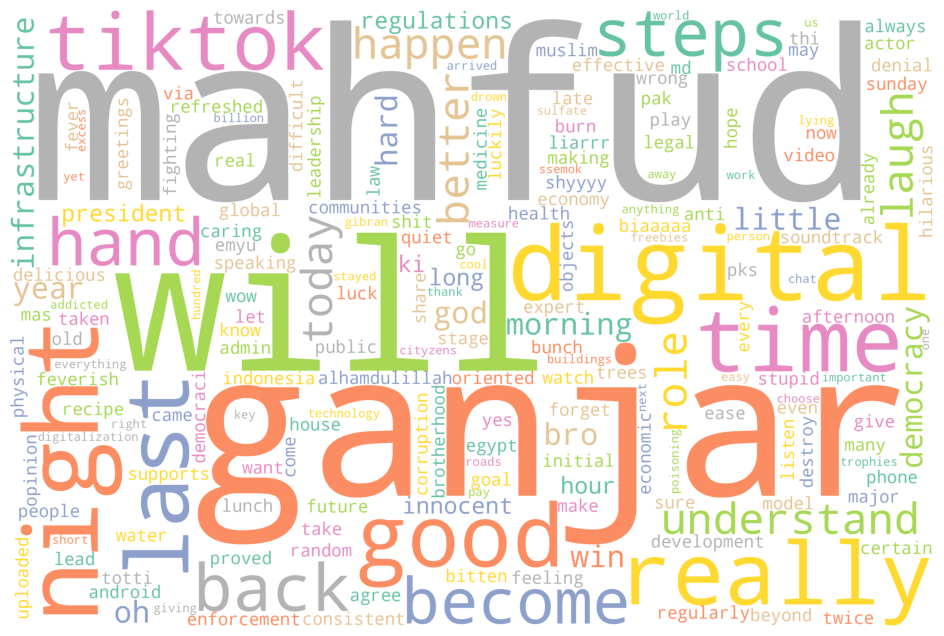

In [ ]:
all_words = ' '.join([tweets for tweets in data['tweet_english']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
wordcloud.to_file(f"{pathname}_sentiment_wc_eng.png")
plot_cloud(wordcloud)

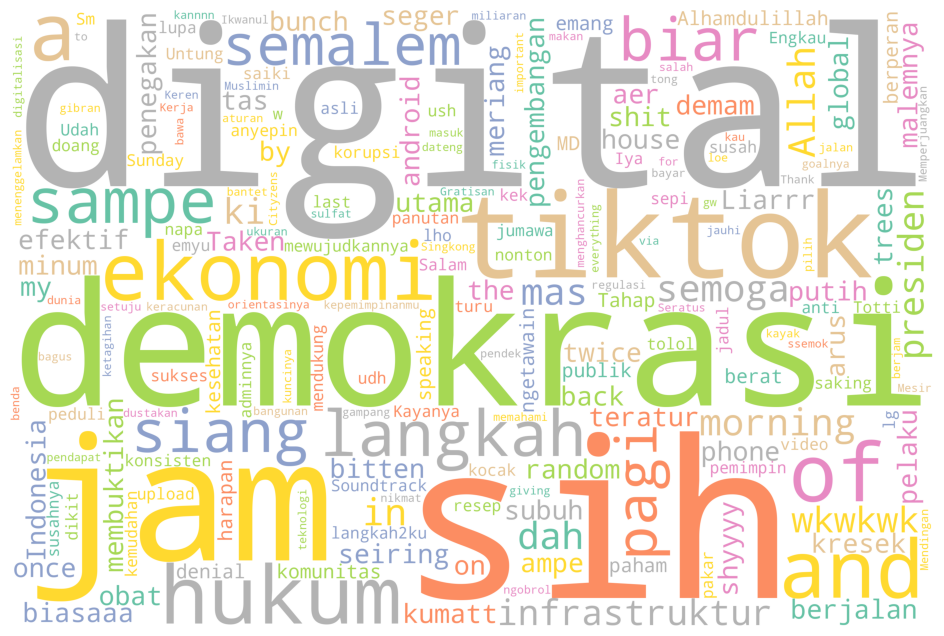

In [ ]:
# Filter nilai-nilai yang valid (string) dari kolom 'tweet_clean'
valid_tweets = [tweets for tweets in data['tweet_clean'] if isinstance(tweets, str)]

# Menggabungkan string-string yang valid menjadi satu string
all_words = ' '.join(valid_tweets)

# Selanjutnya, lanjutkan dengan proses pembuatan wordcloud
wordcloud = WordCloud(width=3000, height=2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords=jangan_Cari).generate(all_words)
wordcloud.to_file(f"{pathname}_sentiment_wc_ind.png")
plot_cloud(wordcloud)


# **membuat wordcloud untuk tweet dengan sentimen positif**

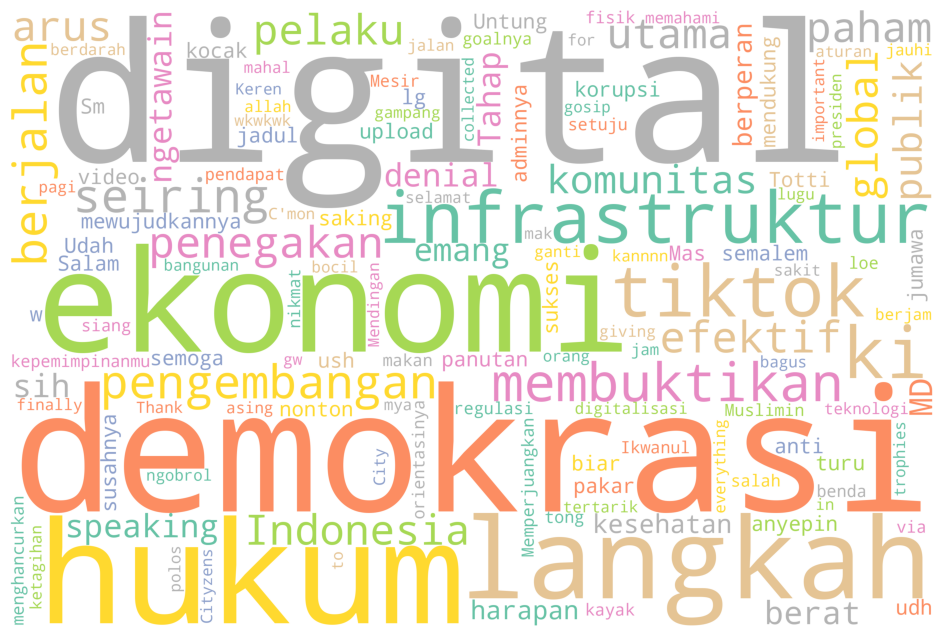

In [ ]:
# Gabungkan semua kata dalam kolom tweet_clean yang memiliki klasifikasi positif
twPositif = 'Positif'
all_words_positive = ' '.join([tweets for index, tweets in enumerate(data['tweet_clean']) if data['klasifikasi'][index] == twPositif])

# Buat wordcloud hanya dari kata-kata yang memiliki klasifikasi positif
wordcloud_positive = WordCloud(width=3000, height=2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords=jangan_Cari).generate(all_words_positive)

# Simpan wordcloud sebagai file gambar
wordcloud_positive.to_file(f"{pathname}_sentiment_wc_ind_"+twPositif+".png")

# Tampilkan wordcloud
plot_cloud(wordcloud_positive)

# **membuat wordcloud untuk tweet dengan sentimen NEGATIF

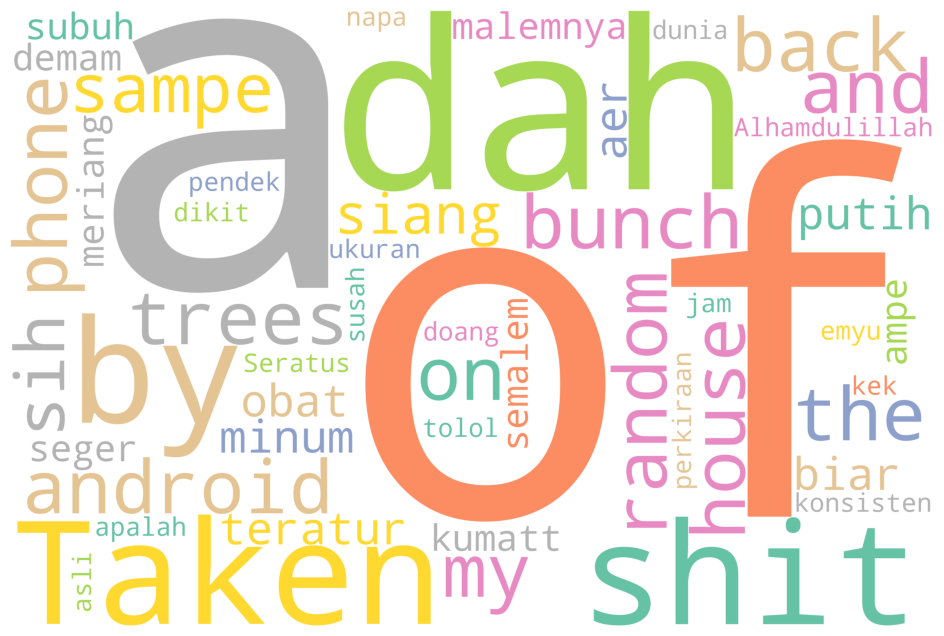

In [ ]:
# Gabungkan semua kata dalam kolom tweet_clean yang memiliki klasifikasi positif
twNegatif = 'Negatif'
all_words_positive = ' '.join([tweets for index, tweets in enumerate(data['tweet_clean']) if data['klasifikasi'][index] == twNegatif])

# Buat wordcloud hanya dari kata-kata yang memiliki klasifikasi positif
wordcloud_positive = WordCloud(width=3000, height=2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords=jangan_Cari).generate(all_words_positive)

# Simpan wordcloud sebagai file gambar
wordcloud_positive.to_file(f"{pathname}_sentiment_wc_ind_"+twNegatif+".png")

# Tampilkan wordcloud
plot_cloud(wordcloud_positive)

In [ ]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.savefig(f"{pathname}_sentiment_wc_piechart.png",bbox_inches='tight')
    plt.show()

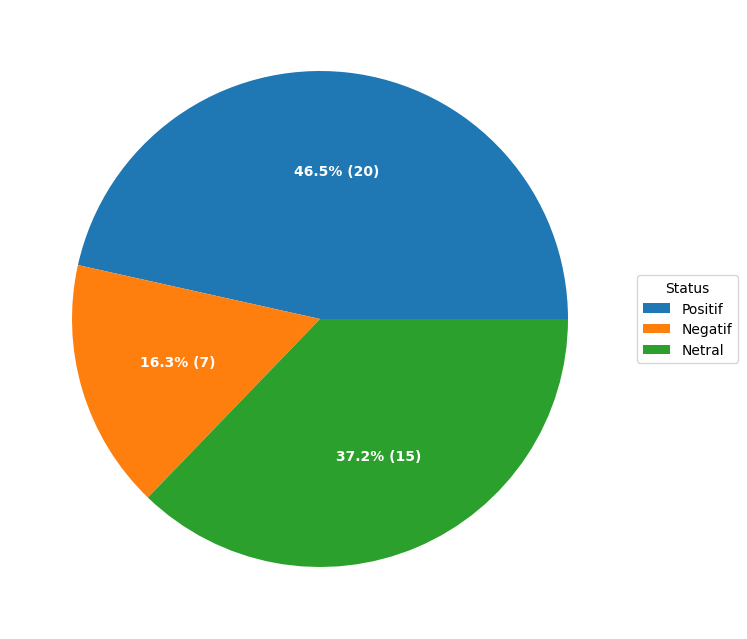

In [ ]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

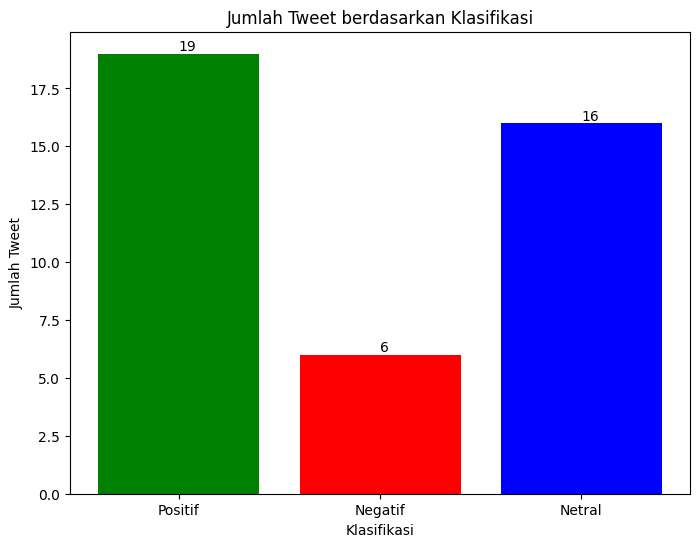

In [ ]:
def show_bar(label, data, xlabel, ylabel, filename):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(label, data, color=['green', 'red', 'blue'])

    # Menambahkan label di atas setiap bar yang berisi jumlah tweetnya
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Jumlah Tweet berdasarkan Klasifikasi")
    plt.savefig(filename, bbox_inches='tight')  # Menyimpan diagram sebagai file gambar
    plt.show()

label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif, total_negatif, total_netral]

show_bar(label, count_data, "Klasifikasi", "Jumlah Tweet", f"{pathname}sentiment_wc_barchart.png")


# **Klasifikasi Data Dengan Metode Naive Bayes Classifier**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#dataset = data.drop(['full_text', 'id_str','tweet_clean','created_at','quote_count','reply_count','retweet_count','favorite_count','lang','user_id_str','conversation_id_str','username','tweet_url'],axis=1,inplace=False)
dataset = data.drop(['full_text', 'tweet_clean',],axis=1,inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]
print(dataset)

[('mahfud proved that digital economic development can go hand in hand with effective law enforcement.', 'Positif'), ('taken by a shit android phone. and a random bunch of trees on the back of my house.', 'Negatif'), ('once bitten and twice shyyyy', 'Netral'), ('liarrr biaaaaa', 'Netral'), ("through mahfud's steps, we can be sure that indonesia will become a major actor in the global digital economy.", 'Positif'), ("it's burn", 'Netral'), ("don't let it happen, this afternoon you have to regularly take medicine with water so that it doesn't come back late at night", 'Negatif'), ('who has had a fever all night and is feeling feverish and is now refreshed? alhamdulillah', 'Negatif'), ('so you understand, in certain communities public speaking is difficult. because many people laugh', 'Positif'), ('the initial stage is really denial.', 'Positif'), ('ganjar and mahfud md are the hope for better health in the future, and we can play a role in making it happen.', 'Positif'), ("today's mornin

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)
print(train_set)

[("luckily i came down last night... the admin is already hilarious, it's so hard to win every year i just uploaded an old school totti video", 'Positif'), ("through mahfud's steps, we can be sure that indonesia will become a major actor in the global digital economy.", 'Positif'), ('ki ki good morn', 'Positif'), ('mahfud understands that infrastructure is not only roads and buildings, but also regulations and digital technology. cool!', 'Positif'), ("anything in excess is not good. that's why i stayed away from tiktok for a long time, because it's really easy to get addicted, it can last for hours. it's better to just chat with you, right?", 'Positif'), ('will someone become president of tiktok... hahaha', 'Positif'), ('mahfud, a legal expert who supports ganjar, is a role model', 'Positif'), ("thank you for giving everything to cityzens in !!! important trophies finally collected, c'mon city!!!", 'Positif'), ("even if you don't have to watch it, just listen to it, so you don't make t

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.6341463414634146


In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 12
Netral = 27
Negatif = 2

Total Data : 41


In [ ]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status

<Figure size 640x480 with 0 Axes>

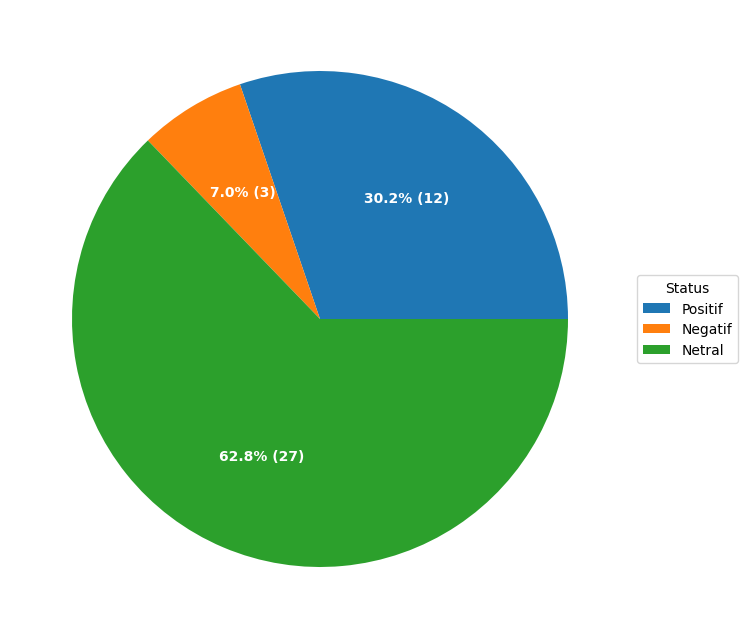

In [ ]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

plt.savefig(f"{pathname}_sentiment_wc_piechart_bayes.png",bbox_inches='tight')
plt.show()
show_pie(label, count_data, "Status")

In [ ]:
try:
    data.to_csv(file_path, index=False)  # 'sentiment_filename.csv' adalah nama file untuk menyimpan hasil analisis
    print("Data berhasil disimpan ke dalam file 'namafile_sentiment.csv'")
except Exception as e:
    print("Terjadi kesalahan saat menyimpan data:", e)

Data berhasil disimpan ke dalam file 'namafile_sentiment.csv'
